# Análise de Planejamento da força de trabalho em saúde para cuidado materno-infantil

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Acessando os dados

O acesso por ser por meio do .csv abaixo. Mas também pela seguinte consulta: 

SELECT * 
FROM Dados."materno_infantil".calendario_ajustado."modelos_ensemble.parquet" p
LEFT JOIN Dados."materno_infantil".calendario_ajustado."procedimentos.parquet" pp 
    ON p.index = pp.fk_previsoes
WHERE cod_regsaud = '31007'

In [2]:
df = pd.read_csv(r"C:\Users\Lapei_Cigets\Documents\GitHub\materno_infantil_sisdim\00_dados\servico_pouso_alegre.csv")
df.head()

,Unnamed: 0,index,uf_sigla,competen,cod_regsaud,regiao_saude,qtd,tipo,codigo_sigtap,mes,parametro,procedimento,tipo_procedimento,Público,nivel_atencao,quantidade,mês_procedimento_realizado,fk_previsoes
0,1,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,301010110,-8,1.0,Consulta pré-natal,Consultas ou Visitas,Todas gestantes,APS,515.0,2023-04-01,106129
1,2,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,301010137,-7,1.0,Visita domiciliar,Consultas ou Visitas,Todas gestantes,APS,515.0,2023-05-01,106129
2,3,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,202,-7,1.0,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,515.0,2023-05-01,106129
3,4,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,203,-7,1.0,Coleta de exame citopatológico de colo de úter...,Exames,Todas gestantes,APS,515.0,2023-05-01,106129
4,5,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,301010110,-7,1.0,Consulta pré-natal,Consultas ou Visitas,Todas gestantes,APS,515.0,2023-05-01,106129


In [3]:
df['competen'] = pd.to_datetime(df['competen']).dt.date
df['mês_procedimento_realizado'] = pd.to_datetime(df['mês_procedimento_realizado']).dt.date
df.head()

,Unnamed: 0,index,uf_sigla,competen,cod_regsaud,regiao_saude,qtd,tipo,codigo_sigtap,mes,parametro,procedimento,tipo_procedimento,Público,nivel_atencao,quantidade,mês_procedimento_realizado,fk_previsoes
0,1,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,301010110,-8,1.0,Consulta pré-natal,Consultas ou Visitas,Todas gestantes,APS,515.0,2023-04-01,106129
1,2,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,301010137,-7,1.0,Visita domiciliar,Consultas ou Visitas,Todas gestantes,APS,515.0,2023-05-01,106129
2,3,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,202,-7,1.0,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,515.0,2023-05-01,106129
3,4,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,203,-7,1.0,Coleta de exame citopatológico de colo de úter...,Exames,Todas gestantes,APS,515.0,2023-05-01,106129
4,5,106129,MG,2023-12-01,31007,Pouso Alegre,515.0,Valor observado - teste,301010110,-7,1.0,Consulta pré-natal,Consultas ou Visitas,Todas gestantes,APS,515.0,2023-05-01,106129


Visualizando o total de nascidos para cada mês e ano. 

In [4]:
nv_mes = (df
    .loc[:, ['competen', 'uf_sigla', 'cod_regsaud', 'regiao_saude', 'qtd']]  
    .drop_duplicates()  
    .assign(qtd=lambda x: x['qtd'].round())  
    .assign(mes_ano=lambda x: pd.to_datetime(x['competen'], format='%Y-%m-%d'))  
    .assign(ano=lambda x: x['mes_ano'].dt.year) 
)

nv_mes.head()

,competen,uf_sigla,cod_regsaud,regiao_saude,qtd,mes_ano,ano
0,2023-12-01,MG,31007,Pouso Alegre,515.0,2023-12-01,2023
80,2023-03-01,MG,31007,Pouso Alegre,640.0,2023-03-01,2023
144,2022-09-01,MG,31007,Pouso Alegre,501.0,2022-09-01,2022
224,2021-05-01,MG,31007,Pouso Alegre,601.0,2021-05-01,2021
304,2024-08-01,MG,31007,Pouso Alegre,553.0,2024-08-01,2024


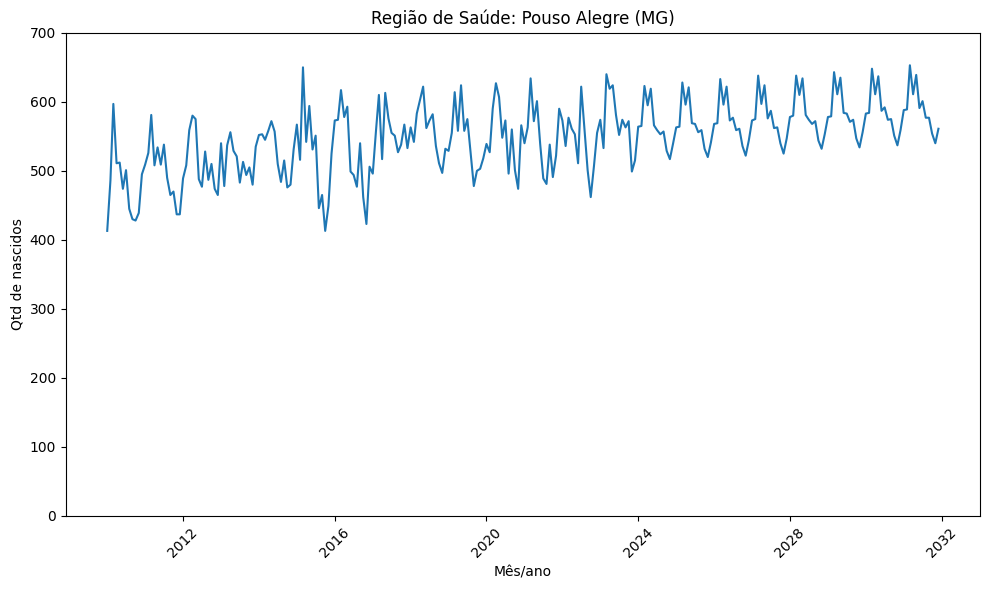

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=nv_mes, 
             x='mes_ano', 
             y='qtd')
plt.ylim(0, 700)
plt.xlabel('Mês/ano')
plt.ylabel('Qtd de nascidos')
plt.title('Região de Saúde: Pouso Alegre (MG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total de nascidos por ano

In [6]:
nv_mes.groupby('ano')['qtd'].sum().reset_index()

,ano,qtd
0,2010,5731.0
1,2011,6004.0
2,2012,6140.0
3,2013,6171.0
4,2014,6333.0
5,2015,6249.0
6,2016,6336.0
7,2017,6641.0
8,2018,6706.0
9,2019,6539.0


Plotando os resultados com desagregação anual. 

**É preferível trabalhar com esta visualização**

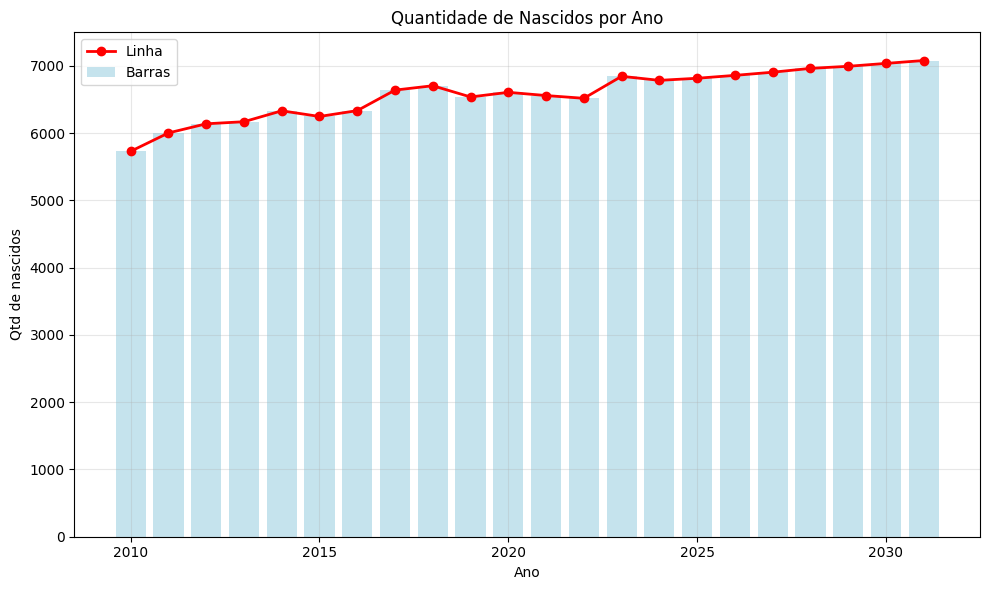

In [8]:
resumo_anual = (nv_mes
    .groupby('ano')
    .agg(qtd_anual=('qtd', 'sum'))
    .reset_index()
)

# Gráfico com barras + linha
plt.figure(figsize=(10, 6))

# Barras
plt.bar(resumo_anual['ano'], 
        resumo_anual['qtd_anual'], 
        color='lightblue', 
        alpha=0.7, 
        label='Barras')

# Linha
plt.plot(resumo_anual['ano'], 
         resumo_anual['qtd_anual'], 
         color='red', 
         marker='o', 
         linewidth=2, 
         label='Linha')

# Configurações
plt.ylim(0, 7500)
plt.xlabel('Ano')
plt.ylabel('Qtd de nascidos')
plt.title('Quantidade de Nascidos por Ano')
plt.grid(True, alpha=0.3)  # theme_minimal equivalent
plt.legend()
plt.tight_layout()
plt.show()

## Total de procedimentos necessários em quantidade 

Vamos visualizar a segunda etapa da metodologia: calcular o total de serviços necessários. Nos códigos abaixo calculamos o total de serviços necessários a cada mês. 

In [9]:
total_servicos = (df
    .groupby([
        'uf_sigla', 
        'cod_regsaud',
        'regiao_saude', 
        'codigo_sigtap',
        'procedimento', 
        'tipo_procedimento', 
        'Público',
        'nivel_atencao',
        'mês_procedimento_realizado'
    ])
    .agg(total=('quantidade', 'sum'))
    .reset_index()
    .rename(columns={'mês_procedimento_realizado': 'mes_proc_realizado'})
    .assign(ano_proc_realizado=lambda x: pd.to_datetime(x['mes_proc_realizado']).dt.year)
    .pipe(lambda df: df[
        ['uf_sigla', 'cod_regsaud', 'regiao_saude', 'codigo_sigtap', 
         'procedimento', 'tipo_procedimento', 'Público', 'nivel_atencao',
         'mes_proc_realizado', 'ano_proc_realizado', 'total']
    ])
)

total_servicos.head()

,uf_sigla,cod_regsaud,regiao_saude,codigo_sigtap,procedimento,tipo_procedimento,Público,nivel_atencao,mes_proc_realizado,ano_proc_realizado,total
0,MG,31007,Pouso Alegre,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,2009-06-01,2009,413.0
1,MG,31007,Pouso Alegre,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,2009-07-01,2009,486.0
2,MG,31007,Pouso Alegre,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,2009-08-01,2009,597.0
3,MG,31007,Pouso Alegre,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,2009-09-01,2009,511.0
4,MG,31007,Pouso Alegre,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,2009-10-01,2009,512.0


Aqui temos o total de procedimentos que precisamos realizar a cada mês. Note que ao final fazemos uma agregação para calcular o total de serviços necessários por ano (somatório de cada serviço para cada ano) e a média de necessidade por mês daquele ano (média de cada serviço para cada ano)

In [11]:
servicos_mensal_anual = (
    total_servicos
    .groupby([
        'uf_sigla',
        'cod_regsaud',
        'regiao_saude',
        'ano_proc_realizado',
        'codigo_sigtap',
        'procedimento',
        'tipo_procedimento',
        'Público',
        'nivel_atencao'
    ])
    .agg(total_procedimentos_anual = ('total','sum'),
         total_procedimentos_mensal = ('total','mean'))
    .reset_index()        
    .assign(total_procedimentos_anual =lambda x: x['total_procedimentos_anual'].round())
    .assign(total_procedimentos_mensal =lambda x: x['total_procedimentos_mensal'].round())  
)

servicos_mensal_anual.head()
    

,uf_sigla,cod_regsaud,regiao_saude,ano_proc_realizado,codigo_sigtap,procedimento,tipo_procedimento,Público,nivel_atencao,total_procedimentos_anual,total_procedimentos_mensal
0,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,3494.0,499.0
1,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do segundo trim...,Exames,Todas gestantes,APS,2519.0,504.0
2,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do terceiro tri...,Exames,Todas gestantes,APS,899.0,450.0
3,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do terceiro tri...,Exames,Gestantes de Alto Risco,Especializada,135.0,67.0
4,MG,31007,Pouso Alegre,2009,203,Coleta de exame citopatológico de colo de úter...,Exames,Todas gestantes,APS,3494.0,499.0


## Total de serviços necessários em horas

O próximo passo consiste em transformar o total de serviços de quantidade de serviços por horas de serviços necessários. Para isso criei uma função que recebe um tempo, em horas, associado a cada procedimento conforme o código SIGTAP. 

Wemerson, eu acabei tratando o código SIGTAP como um numérico, mas seria melhor manter como string desde sempre. 

In [12]:
def conversao_qtd_horas(servicos_mensal_anual, **tempos):
   
    """
    Calcula quantidade de horas por procedimento baseado nos códigos SIGTAP
    
    Uso:
    resultado = conversao_qtd_horas(
        servicos_mensal_anual,
        tempo_imunizacao=0.5,
        tempo_odonto=1.2,
        tempo_visita_domc=2.0,
        # ... etc
    )
    """


    mapeamento_tempo = {
        1234: tempos.get('tempo_imunizacao', 0),
        301010153: tempos.get('tempo_odonto', 0),
        301010137: tempos.get('tempo_visita_domc', 0),
        301010110: tempos.get('tempo_prenatal', 0),
        301010080: tempos.get('tempo_consulta_cd', 0),
        301010129: tempos.get('tempo_puerperal', 0),
        301010072: tempos.get('tempo_consulta_obs', 0),
        202: tempos.get('tempo_coleta', 0),
        101010010: tempos.get('tempo_acoes_educ', 0),
        202110060: tempos.get('tempo_pezinho', 0),
        203: tempos.get('tempo_coleta_cito', 0),
        211070149: tempos.get('tempo_orelhinha', 0),
        211060275: tempos.get('tempo_olhinho', 0),
        3010100480: tempos.get('tempo_psico', 0),
        3010100481: tempos.get('tempo_enfermeiro', 0),
        3010100482: tempos.get('tempo_aso', 0),
        3010100483: tempos.get('tempo_nutri', 0),
        3010100484: tempos.get('tempo_fisio', 0),
        3010100485: tempos.get('tempo_tec_enf', 0),
        310010039: tempos.get('tempo_parto', 0),
        211040061: tempos.get('tempo_toco', 0),
        211020079: tempos.get('tempo_coracaozinho', 0),
        211020036: tempos.get('tempo_eletro', 0),
        205020500: tempos.get('tempo_usg_morf', 0),
        205020151: tempos.get('tempo_usg_dop', 0),
        205020143: tempos.get('tempo_usg', 0)
    }
    
    resultado = servicos_mensal_anual.copy()
    resultado['qtd_horas'] = (
        resultado['codigo_sigtap'].map(mapeamento_tempo).fillna(0) * 
        resultado['total_procedimentos_mensal']
    )
    
    return resultado


Chamando a função 

In [13]:
servicos_horas = conversao_qtd_horas(
    servicos_mensal_anual,  
    tempo_imunizacao=0.25,
    tempo_odonto=0.5,
    tempo_visita_domc=0.75,
    tempo_prenatal=0.6,
    tempo_consulta_cd=0.45,
    tempo_puerperal=0.3,
    tempo_consulta_obs=0.55,
    tempo_coleta=0.2,
    tempo_acoes_educ=0.8,
    tempo_pezinho=0.15,
    tempo_coleta_cito=0.35,
    tempo_orelhinha=0.4,
    tempo_olhinho=0.3,
    tempo_psico=0.9,
    tempo_enfermeiro=0.7,
    tempo_aso=0.5,
    tempo_nutri=0.65,
    tempo_fisio=0.75,
    tempo_tec_enf=0.4,
    tempo_parto=0.95,
    tempo_toco=0.85,
    tempo_coracaozinho=0.25,
    tempo_eletro=0.3,
    tempo_usg_morf=0.6,
    tempo_usg_dop=0.5,
    tempo_usg=0.45
)

servicos_horas.head()


,uf_sigla,cod_regsaud,regiao_saude,ano_proc_realizado,codigo_sigtap,procedimento,tipo_procedimento,Público,nivel_atencao,total_procedimentos_anual,total_procedimentos_mensal,qtd_horas
0,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do primeiro tri...,Exames,Todas gestantes,APS,3494.0,499.0,99.80
1,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do segundo trim...,Exames,Todas gestantes,APS,2519.0,504.0,100.80
2,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do terceiro tri...,Exames,Todas gestantes,APS,899.0,450.0,90.00
3,MG,31007,Pouso Alegre,2009,202,Coleta de exames laboratoriais do terceiro tri...,Exames,Gestantes de Alto Risco,Especializada,135.0,67.0,13.40
4,MG,31007,Pouso Alegre,2009,203,Coleta de exame citopatológico de colo de úter...,Exames,Todas gestantes,APS,3494.0,499.0,174.65


A seguir a gente inclui dois bancos de dados. A tabela relacao traz a relação entre o procedimento pelo código SIGTAP e as respectivas categorias profissionais. A segunda proced_prof_qtd mostra quantos profissionais executam cada procedimento. 

De acordo com esta lógica, estamos fazendo uma divisão equitativa entre os profissionais. Se precisamos de 1000 horas para consulta pré-natal, dividimos 500 horas para médicos e 500 horas para enfermeiros. 

Precisamos pensar em uma lógica que permita parametrizar a distribuição de serviços entre diferentes categorias (ex.: quero alocar 60% para médicos e 40% para enfermeiros).

In [14]:
# acessando dados para fazer a relação entre os procedimentos e os profissionais. 

relacao = pd.read_csv(r"C:\Users\Lapei_Cigets\Documents\GitHub\materno_infantil_sisdim\00_dados\relacao_prof.csv")

proced_prof_qtd = (relacao
    .groupby(["codigo_sigtap", "procedimento"])
    .size()
    .reset_index(name='n')
)

prof_cbo = relacao[["CBO","Profissional"]].drop_duplicates()

Incluindo o parâmetro mix de profissionais

In [15]:
servicos_mix = (servicos_horas
    .merge(relacao, 
           on=['codigo_sigtap', 'procedimento'], 
           how='inner')
    .merge(proced_prof_qtd, 
           on=['codigo_sigtap', 'procedimento'], 
           how='inner')
    .assign(horas_prof=lambda x: x['qtd_horas'] / x['n'])
    .groupby([
        'uf_sigla', 
        'cod_regsaud', 
        'regiao_saude', 
        'ano_proc_realizado', 
        'nivel_atencao',
        'Profissional'
    ])
    .agg(total_horas_mensal=('horas_prof', 'sum'))
    .reset_index()
    .merge(prof_cbo, 
           on='Profissional', 
           how='left')
)

servicos_mix

,uf_sigla,cod_regsaud,regiao_saude,ano_proc_realizado,nivel_atencao,Profissional,total_horas_mensal,CBO
0,MG,31007,Pouso Alegre,2009,APS,Agente Comunitário de Saúde,381.1875,5151
1,MG,31007,Pouso Alegre,2009,APS,Cirurgião dentista,408.5000,2232
2,MG,31007,Pouso Alegre,2009,APS,Enfermeiro,1528.6125,2235
3,MG,31007,Pouso Alegre,2009,APS,Médico,1383.3125,225
4,MG,31007,Pouso Alegre,2009,APS,Técnico ou Auxiliar de enfermagem,526.4875,3222
...,...,...,...,...,...,...,...,...
279,MG,31007,Pouso Alegre,2033,APS,Enfermeiro,328.5250,2235
280,MG,31007,Pouso Alegre,2033,APS,Médico,525.1500,225
281,MG,31007,Pouso Alegre,2033,APS,Técnico ou Auxiliar de enfermagem,68.8750,3222
282,MG,31007,Pouso Alegre,2034,APS,Enfermeiro,132.7500,2235


Calculando o TTD

In [24]:
def calculo_ttd(servicos_mix, 
                ferias, 
                licensas, 
                ausencias):

    ttd = 160 - (ferias + licensas + ausencias)

    servicos_mix['fte'] = servicos_mix['total_horas_mensal']/ttd

    return servicos_mix

profissionais = calculo_ttd(servicos_mix=servicos_mix,
                            ferias = 8, licensas = 14, ausencias = 10)

profissionais.head()



,uf_sigla,cod_regsaud,regiao_saude,ano_proc_realizado,nivel_atencao,Profissional,total_horas_mensal,CBO,fte
0,MG,31007,Pouso Alegre,2009,APS,Agente Comunitário de Saúde,381.1875,5151,2.978027
1,MG,31007,Pouso Alegre,2009,APS,Cirurgião dentista,408.5000,2232,3.191406
2,MG,31007,Pouso Alegre,2009,APS,Enfermeiro,1528.6125,2235,11.942285
3,MG,31007,Pouso Alegre,2009,APS,Médico,1383.3125,225,10.807129
4,MG,31007,Pouso Alegre,2009,APS,Técnico ou Auxiliar de enfermagem,526.4875,3222,4.113184


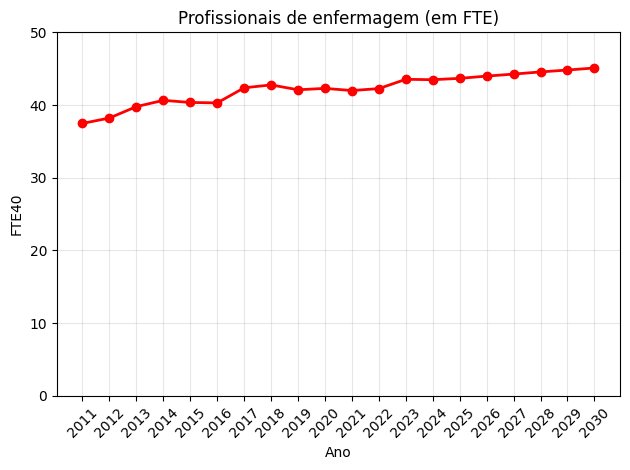

In [34]:
enf_aps = profissionais[(profissionais.nivel_atencao == 'APS') & 
                        (profissionais.Profissional == 'Enfermeiro') & 
                        (profissionais.ano_proc_realizado < 2031) & 
                        (profissionais.ano_proc_realizado > 2010)]

plt.plot(enf_aps['ano_proc_realizado'], 
         enf_aps['fte'], 
         color='red', 
         marker='o', 
         linewidth=2, 
         label='Linha')

# Configurações
plt.ylim(0, 50)
plt.xlabel('Ano')
plt.ylabel('FTE40')
plt.title('Profissionais de enfermagem (em FTE)')
plt.grid(True, alpha=0.3)

plt.xticks(range(int(enf_aps['ano_proc_realizado'].min()), 
                int(enf_aps['ano_proc_realizado'].max()) + 1), 
           rotation=45)

plt.tight_layout()
plt.show()